# Microfluidics

## Straight Channels

### Velocity profile of the fluid

Raw-ish Data<br>
Exposure time: (0.179 748 535 ± 0.000 000 001)s<br>
Scale on photo: (78 ± 1)px = (100 ± 1) micrometers<br>
Total Channel Size (524 ± 1)px. Bottom will be z=0
- 1: z = (0 ± 1)px, d = (3 ± 1)px)- 
-	2: z = (56 ± 1)px, d = (12 ± 1)- x
-	3: z = (138 ± 1)px, d = (22 ± - px
-	4: z = (233 ± 1)px, d = (37 ± -  px
-	5: z = (296 ± 1)px, d = (26 ±- ) px
-	6: z = (342 ± 1)px, d = (27 - 1) px
-	7: z = (388 ± 1) px, d = (22-  1) px
-	8: z = (443 ± 1) px, d = (2- ± 1) px
-	9: z = (519 ± 1) px, d = (10 ± 1) px


In [2]:
# Total channel size is (524 ± 1)px. Bottom is z = 0
# following values are in pixels
ch_sz = 524
ch_sz_unc = 1
z = [0, 56, 138, 233, 296, 342, 388, 443, 519]
z_unc = [1] * len(z)
# d is the length of the streak
d = [3, 12, 22, 37, 26, 27, 22, 24, 10]
d_unc = [1] * len(z)
print("z, z_unc, d, d_unc")
print(z)
print(z_unc)
print(d)
print(d_unc)
print()

# scale is (78 ± 1)px = (100 ± 1)micrometers
pxmicm = 100/78
pxmicm_unc = pxmicm * ((1/100)**2 + (1/78)**2)**0.5
print("scale:", pxmicm, "±", pxmicm_unc)
print()

# convert previous values to micrometers
for i in range(0, len(z)):
    oldz = z[i]
    oldzu = z_unc[i]
    z[i] = pxmicm * oldz
    if (i != 0):
        # if i == 0 the unit conversion does nothing and the error is 
        # the same
        z_unc[i] = z[i] * ((oldzu/oldz)**2 + (pxmicm_unc/pxmicm)**2)**0.5

    oldd = d[i]
    olddu = d_unc[i]
    d[i]  = pxmicm * oldd
    d_unc[i] = d[i] * ((olddu/oldd)**2 + (pxmicm_unc/pxmicm)**2)**0.5
t1 = ch_sz
t2 = ch_sz_unc
ch_sz *= pxmicm
ch_sz_unc = ch_sz * ((t2/t1)**2 + (pxmicm_unc/pxmicm)**2)**0.5
# convert everything to m
#for i in range(0, len(z)):
 #   z[i] *= 10**(-6)
  #  z_unc[i] *= 10**(-6)
   # d[i] *= 10**(-6)
#    d_unc[i] *= 10**(-6)
#ch_sz *= 10**(-6)
#ch_sz_unc *= 10**(-6)
print("z, z_unc, d, d_unc")
print(z)
print(z_unc)
print(d)
print(d_unc)
print()
print("channel size:", ch_sz, "±", ch_sz_unc)
print()

# velocity
t = 0.179748535 
t_unc = 0.000000001
v = [0] * len(d)
v_unc = [0] * len(d)

for i in range(0, len(v)):
    v[i] = d[i]/t
    v_unc[i] = v[i] * ((t_unc/t)**2 + (d_unc[i]/d[i])**2)**0.5
print("v, v_unc")
print(v)
print(v_unc)

z, z_unc, d, d_unc
[0, 56, 138, 233, 296, 342, 388, 443, 519]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 12, 22, 37, 26, 27, 22, 24, 10]
[1, 1, 1, 1, 1, 1, 1, 1, 1]

scale: 1.2820512820512822 ± 0.020845284500312544

z, z_unc, d, d_unc
[0.0, 71.7948717948718, 176.92307692307693, 298.71794871794873, 379.4871794871795, 438.4615384615385, 497.43589743589746, 567.948717948718, 665.3846153846155]
[1, 1.7338767741649077, 3.1494073189838954, 5.02330880091783, 6.301989805508536, 7.243448157341675, 8.188951120661542, 9.323032021375685, 10.894401435666023]
[3.8461538461538467, 15.384615384615387, 28.205128205128208, 47.43589743589744, 33.333333333333336, 34.61538461538462, 28.205128205128208, 30.769230769230774, 12.820512820512821]
[1.2835755617736055, 1.306226327011819, 1.3616042077580541, 1.496168916802186, 1.3919033690156226, 1.4001517277172806, 1.3616042077580541, 1.3762057985952332, 1.2988872462224093]

channel size: 671.7948717948718 ± 10.997910489561416

v, v_unc
[21.397414149460783, 85.5896565978431

popt: [-1.51056982e-03  1.07836554e+00  2.15647605e+01]
pcov: [[ 6.05524997e-08 -3.91890398e-05  3.55988570e-03]
 [-3.91890398e-05  2.75474077e-02 -3.05546932e+00]
 [ 3.55988570e-03 -3.05546932e+00  5.67244502e+02]]
perr: [2.46074175e-04 1.65974118e-01 2.38168953e+01]

channel size: 671.7948717948718 ± 10.997910489561416
middle of channel: 335.8974358974359 ± 5.498955244780708
max velocity on fit: 353.06122448979596



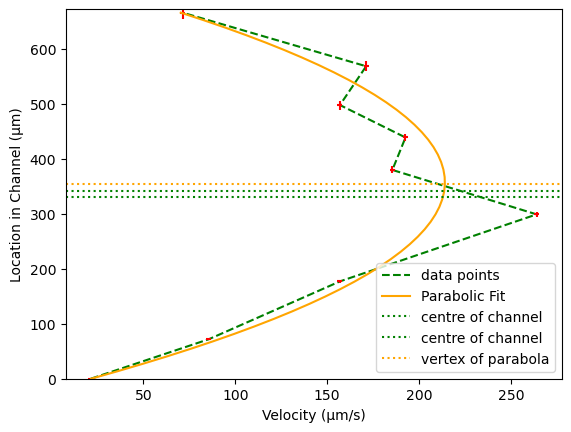

In [3]:
# plot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

fig, ax = plt.subplots()

# plot
ax.plot(v, z, 'g--', label="data points")
ax.errorbar(v, z, color='r', xerr=d_unc, yerr=z_unc, fmt='none')
v = np.array(v)
z = np.array(z)

# fit? DECIDE IF YOU WANT TO ADD THIS 
#(NOT EVEN SURE IF IT SHOULD BE QUADRATIC)
# apparently should be quadratic if it's laminar flow?
def f (x, a, b, c):
    return a*x**2 + b*x + c
    
popt, pcov = curve_fit(f, z, v)
print("popt:", popt)
print("pcov:", pcov)
perr = np.sqrt(np.diag(pcov))
print("perr:", perr)
print()

# find the vertex
x = np.linspace(np.min(z), np.max(z), 50)
y = f(x, *popt)
y_max = max(y)
x_v = x[y.tolist().index(y_max)]
print("channel size:", ch_sz, "±", ch_sz_unc)
ch_sz_mid = ch_sz/2
ch_sz_mid_unc = ch_sz_mid * ch_sz_unc / ch_sz
print("middle of channel:", ch_sz_mid, "±", ch_sz_mid_unc)
print("max velocity on fit:", x_v)
print()

# plot the fit
ax.plot(f(x, *popt), x, label='Parabolic Fit', color='orange')
# plot lines at centre of channel, max of parabola
ax.axhline(y=ch_sz_mid+ch_sz_mid_unc, color='g', linestyle=':', label="centre of channel")
ax.axhline(y=ch_sz_mid-ch_sz_mid_unc, color='g', linestyle=':', label="centre of channel")
ax.axhline(y=x_v, color='orange', linestyle=':', label="vertex of parabola")

ax.set_ylabel('Location in Channel (µm)')
ax.set_ylim(0, ch_sz)
ax.set_xlabel('Velocity (µm/s)')
ax.legend()

fig.savefig("v_profile.png", bbox_inches='tight')#, pad_inches=0.5)

In [ ]:
# USE CHI-SQUARED TEST FOR GOODNESS OF FIT ABOVE?

Change the syringe to at least four different heights and measure the resulting velocity at
the same point in the straight channel at each height. (Hint: Plot height on the x-axis and
velocity on the y-axis).

Point chosen: 200 mcm

| height (cm) | distance (px) | location (px) | scale (px) : (100 ± 1)micm |
| ------ | -------- |-----| ----|
| 9.6 |15 ± 1|152 ± 1| 76 ± 1 |
| 10.2 |25 ± 1|152 ± 1| 76 ± 1 |
| 10.8 |29 ± 3|152 ± 1|76 ± 1|
| 11.9 |36 ± 1|152 ± 1|76 ± 1|



In [4]:
# data
h = ["9.6", "10.2", "10.8", "11.9"] # in cm!
d = [15, 25, 29, 36] # in px
d_unc = [1, 1, 3, 1]

# convert d 

# scale is (76 ± 1)px = (100 ± 1)micrometers
pxmicm = 100/76
pxmicm_unc = pxmicm * ((1/100)**2 + (1/76)**2)**0.5
print("scale:", pxmicm, "±", pxmicm_unc)
print()

# convert previous values to micrometers
for i in range(0, len(d)):
    oldd = d[i]
    olddu = d_unc[i]
    d[i]  = pxmicm * oldd
    d_unc[i] = d[i] * ((olddu/oldd)**2 + (pxmicm_unc/pxmicm)**2)**0.5
# convert everything to m
for i in range(0, len(d)):
    d[i] *= 10**(-6)
    d_unc[i] *= 10**(-6)
print("d:", d)
print("d_unc:", d_unc)
print()

# velocity
print("t:", t, "±", t_unc)
print()
v = [0] * len(d)
v_unc = [0] * len(d)

for i in range(0, len(v)):
    v[i] = d[i]/t
    v_unc[i] = v[i] * ((t_unc/t)**2 + (d_unc[i]/d[i])**2)**0.5
print("v, v_unc")
print(v)
print(v_unc)

scale: 1.3157894736842106 ± 0.021745593446132385

d: [1.9736842105263158e-05, 3.289473684210526e-05, 3.8157894736842105e-05, 4.736842105263158e-05]
d_unc: [1.3556171571580151e-06, 1.423673491539043e-06, 3.997424398683536e-06, 1.5310592870110197e-06]

t: 0.179748535 ± 1e-09

v, v_unc
[0.00010980251997749611, 0.00018300419996249352, 0.0002122848719564925, 0.0002635260479459907]
[7.54174245235445e-06, 7.9203621411382e-06, 2.2238981801345653e-05, 8.517784509403888e-06]


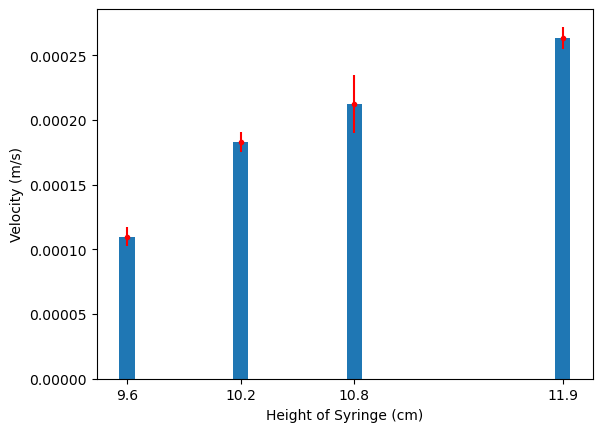

In [5]:
# plot
fig, ax = plt.subplots()

# space to scale
x_pos = [1,7,13,24]
# x error bar is width
ax.bar(x_pos, v)
ax.set_xticks(x_pos, h)
# y error bar is actual error bar
ax.errorbar(x_pos, v, color='r', yerr=v_unc, fmt='.')
#v = np.array(v)

ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Height of Syringe (cm)')

fig.savefig("height_bar.png", bbox_inches='tight')#, pad_inches=0.5)

6.331469983117959e-05 -0.0004805642757456649


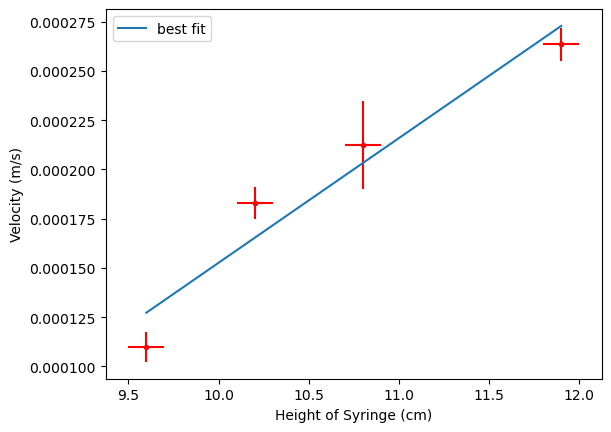

In [6]:
# plot
fig, ax = plt.subplots()

#ax.scatter([9.6, 10.2, 10.8, 11.9], v)
ax.errorbar([9.6, 10.2, 10.8, 11.9], v, color='r', xerr=0.1, yerr=v_unc, fmt='.')

# try to curve fit
p = np.polyfit([9.6, 10.2, 10.8, 11.9], v, 1)
x = [9.6, 10.2, 10.8, 11.9] 
y = [0] * len(x)
for i in range(0, len(x)):
    y[i] = x[i] * p[0] + p[1]
ax.plot(x, y, label="best fit")

# theoretical fit (from Q7)

ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Height of Syringe (cm)')
ax.legend()
print(p[0], p[1])

fig.savefig("height_scatter.png", bbox_inches='tight')#, pad_inches=0.5)

popt: [ 6.33147000e-05 -4.80564278e-04]
pcov: [[ 1.36699075e-10 -1.45242767e-09]
 [-1.45242767e-09  1.55307236e-08]]
perr: [1.16918379e-05 1.24622324e-04]



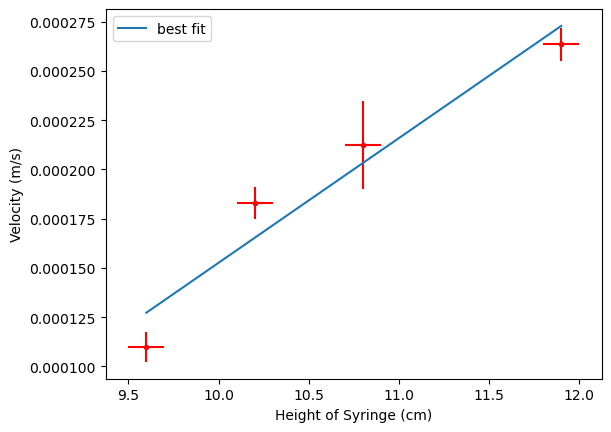

In [12]:
# try with curve_fit bc I want errors
def f2 (x, m, b):
    return m*x+ b

# plot
fig, ax = plt.subplots()

#ax.scatter([9.6, 10.2, 10.8, 11.9], v)
ax.errorbar([9.6, 10.2, 10.8, 11.9], v, color='r', xerr=0.1, yerr=v_unc, fmt='.')

# try to curve fit
x = np.array([9.6, 10.2, 10.8, 11.9])
popt, pcov = curve_fit(f2, x, v)
print("popt:", popt)
print("pcov:", pcov)
perr = np.sqrt(np.diag(pcov))
print("perr:", perr)
print()

ax.plot(x, f2(x, *(popt)), label="best fit")

# theoretical fit (from Q7)

ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Height of Syringe (cm)')
ax.legend()

fig.savefig("height_scatter2.png", bbox_inches='tight')#, pad_inches=0.5)


Yeah the scatterplot looks a lot better

In [16]:
# check if values changed
print("middle of previous channel:", ch_sz_mid, "±", ch_sz_mid_unc)

# channel size
ch_sz = 520 # pixels
ch_sz_unc = 1

# scale is (76 ± 1)px = (100 ± 1)micrometers
pxmicm = 100/76
pxmicm_unc = pxmicm * ((1/100)**2 + (1/76)**2)**0.5
print("scale:", pxmicm, "±", pxmicm_unc)
print()

# convert channel size
t1 = ch_sz
t2 = ch_sz_unc
ch_sz *= pxmicm
ch_sz_unc = ch_sz * ((t2/t1)**2 + (pxmicm_unc/pxmicm)**2)**0.5

# calculate unc for z=200
ch_sz_point = 200
ch_sz_point_unc = ch_sz_point * ch_sz_unc / ch_sz
print(200, "±", ch_sz_point_unc)

middle of previous channel: 335.8974358974359 ± 5.498955244780708
scale: 1.3157894736842106 ± 0.021745593446132385

200 ± 3.3276323039535973


## Channels of Different Sizes

In [27]:
# same scale as before
pxmicm = 100/76
pxmicm_unc = pxmicm * ((1/100)**2 + (1/76)**2)**0.5
print("scale:", pxmicm, "±", pxmicm_unc)
print()

# channel widths
# g1, g2, a1, a2
w = [178, 501, 200, 526]
w_unc = [1, 1, 1, 1]

for i in range(0, len(w)):
    w[i] *= pxmicm
    w_unc[i] = w[i] * ((w_unc[i]/w[i])**2 + (pxmicm_unc/pxmicm)**2)**0.5
print("widths")
print(w)
print(w_unc)
print()

# areas
S = [0] * len(w)
S_unc = [0] * len(S)
for i in range(0, len(w)):
    S[i] = np.pi/4 * w[i]**2
    S_unc[i] = 2*S[i]*(w_unc[i]/w[i]**3)
print("areas")
print(S)
print(S_unc)
print()

# ratios, S1:S2 for each channel
rS = [S[0]/S[1], S[2]/S[3]]
rS_unc = [rS[0] * ((S_unc[0]/S[0])**2 + (S_unc[1]/S[1])**2)**0.5,
          rS[1] * ((S_unc[2]/S[2])**2 + (S_unc[3]/S[3])**2)**0.5]
print("ratios of areas, before:after")
print(rS)
print(rS_unc)
print()

scale: 1.3157894736842106 ± 0.021745593446132385

widths
[234.21052631578948, 659.2105263157895, 263.15789473684214, 692.1052631578948]
[3.9978043367249336, 10.940340592791328, 4.462603878116345, 11.481812180904138]

areas
[43082.67903234895, 341301.4619302682, 54390.45452890917, 376213.33493101184]
[0.02681235752361178, 0.02606913289611119, 0.026637398762806085, 0.02605902506277941]

ratios of areas, before:after
[0.1262305727865626, 0.14457343607685524]
[7.91486219794251e-08, 7.15086360631751e-08]



In [39]:
# convert streak lengths to velocities
g_t = 0.208068848
a_t = 0.140838623
t_unc = 0.000000009

# same scale
print("scale:", pxmicm, "±", pxmicm_unc)
print()

# distances
# g1, g2, a1, a2
d = [45, 38, 46, 27]
d_unc = [13, 1, 1, 1]

# unit conversion to µm
for i in range(0, len(d)):
    d[i] *= pxmicm
    d_unc[i] = d[i] * ((d_unc[i]/d[i])**2 + (pxmicm_unc/pxmicm)**2)**0.5
print("distances")
print(d)
print(d_unc)
print()

# velocity
v = [0] * len(d)
v_unc = [0] * len(v)
for i in range(0, 2):
    # g
    v[i] = d[i]/g_t
    v_unc[i] = v[i] * ((d_unc[i]/d[i])**2 + (t_unc/g_t)**2)**0.5
    # a
    j = 2+i
    v[j] = d[j]/a_t
    v_unc[j] = v[j] * ((d_unc[j]/v[j])**2 + (t_unc/a_t)**2)**0.5
print("velocities")
print(v)
print(v_unc)
print()

# mean velocity
U = [0] * len(v)
U_unc = [0] * len(U)
for i in range(0, len(U)):
    U[i] = v[i]/2
    U_unc[i] = U[i] * (v_unc[i]/v[i])
print("mean velocities")
print(U)
print(U_unc)
print()

# ratios, U2:U1 for each channel
rU = [U[1]/U[0], U[3]/U[2]]
rU_unc = [rU[0] * ((S_unc[0]/S[0])**2 + (S_unc[1]/S[1])**2)**0.5,
          rU[1] * ((S_unc[2]/S[2])**2 + (S_unc[3]/S[3])**2)**0.5]
print("ratios of mean velocities, after:before")
print(rU)
print(rU_unc)
print()

scale: 1.3157894736842106 ± 0.021745593446132385

distances
[59.21052631578948, 50.0, 60.526315789473685, 35.526315789473685]
[13.036777341026696, 1.2972376361964462, 1.4144237997964366, 1.1596218513905914]

velocities
[284.571798637485, 240.30507440498732, 429.75651494032064, 252.24838920410124]
[62.656074978734665, 6.234655733751402, 1.414423800063047, 1.159621851502626]

mean velocities
[142.2858993187425, 120.15253720249366, 214.87825747016032, 126.12419460205062]
[31.328037489367333, 3.117327866875701, 0.7072119000315235, 0.579810925751313]

ratios of mean velocities, after:before
[0.8444444444444443, 0.5869565217391304]
[5.294803995619182e-07, 2.903193106348945e-07]



## Channels with Bends

In [42]:
# scale is the same
# scale: 1.3157894736842106 ± 0.021745593446132385
print("scale:", pxmicm, "±", pxmicm_unc)
print()

# distances
# sm1, sm2, sh1, sh2
d = [23.6, 35.4, 21, 44]
d_unc = [1, 4, 1, 14]

# unit conversion to µm
for i in range(0, len(d)):
    d[i] *= pxmicm
    d_unc[i] = d[i] * ((d_unc[i]/d[i])**2 + (pxmicm_unc/pxmicm)**2)**0.5
print("distances")
print(d)
print(d_unc)
print()

# time
t = [0.240875244, 0.240875244, 0.140838623, 0.140838623]
t_unc = 0.000000009

# calculate velocity
v = [0] * len(d)
v_unc = [0] * len(v)
for i in range(0, len(v)):
    v[i] = d[i]/t[i]
    v_unc[i] = v[i] * ((d_unc[i]/d[i])**2 + (t_unc/t[i])**2)**0.5
print("velocities")
print(v)
print(v_unc)
print()

# velocity ratios after:before
vr = [v[1]/v[0], v[3]/v[2]]
vr_unc = [vr[0] * ((v_unc[1]/v[1])**2 + (v_unc[0]/v[0])**2)**0.5,
          vr[1] * ((v_unc[3]/v[3])**2 + (v_unc[2]/v[2])**2)**0.5]
print("velocity ratios, after:before")
print(vr)
print(vr_unc)
print()

scale: 1.3157894736842106 ± 0.021745593446132385

distances
[31.052631578947373, 46.578947368421055, 27.631578947368425, 57.89473684210527]
[1.123997393184415, 4.073399417531021, 1.0993343613010074, 14.032657550701227]

velocities
[128.91582822412158, 193.37374233618237, 196.1931916031899, 411.0714490733502]
[4.666305156643717, 16.910826326060278, 7.8056312812886945, 99.63642963693076]

velocity ratios, after:before
[1.5, 2.095238095238095]
[0.1419697156089598, 0.5146445776346219]

